## Importing Package

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from sklearn.svm import SVC

## Dataset
Loading the dataset from online.

In [101]:
original_test = pd.read_csv('https://raw.githubusercontent.com/Socrano/DS4400-Project/main/test.csv')

In [102]:
original_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [103]:
original_train = pd.read_csv('https://raw.githubusercontent.com/Socrano/DS4400-Project/main/train.csv')

In [104]:
original_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Data Wrangling

In [105]:
df = pd.concat([original_train, original_test])
df.shape

(129880, 25)

In [106]:
df = df.dropna()
df.shape

(129487, 25)

In [107]:
#Select the column for features and target
features = df.iloc[:,:24]
target = df.iloc[:,24:25]
features.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [108]:
#Show distinct categories for the following variables
pd.unique(target['satisfaction'])

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [109]:
pd.unique(features['Gender'])

array(['Male', 'Female'], dtype=object)

In [110]:
pd.unique(features['Customer Type'])

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [111]:
pd.unique(features['Type of Travel'])

array(['Personal Travel', 'Business travel'], dtype=object)

In [112]:
pd.unique(features['Class'])

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [113]:
# Convert categorical variable to numerical labels
def classify(class_1, class_2, x):
    if (x == class_1):
        return 0
    else:
        return 1

In [114]:
# Encoding categorical variables to numerical labels
features['Gender'] = features['Gender'].apply(lambda x: classify('Male', 'Female', x))
features['Customer Type'] = features['Customer Type'].apply(lambda x: classify('Loyal Customer', 'disloyal Customer', x))
features['Type of Travel'] = features['Type of Travel'].apply(lambda x: classify('Personal Travel', 'Business travel', x))
target['satisfaction'] = target['satisfaction'].apply(lambda x: classify('neutral or dissatisfied', 'satisfied', x))
features = features.drop(columns=['Unnamed: 0', 'id'])

In [115]:
y = pd.get_dummies(features.Class)

In [116]:
features = features.drop(columns = ['Class'])
features['Business'] = y['Business']
features['Eco'] = y['Eco']
features['Eco Plus'] = y['Eco Plus']

## Split training and testing data

In [117]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

## Scaling & Feature Selection

In [118]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [148]:
X_train_scaled.shape

(97115, 24)

In [119]:


##A function help to compare how many features should be selected
feature_number_list = []
feature_name_list = []
train_acc_list = []
test_acc_list = []
def RFE_feature_selection(n):
    select = RFE(DecisionTreeClassifier(random_state=3000), n_features_to_select=n)
    select.fit(X_train_scaled, y_train)
    X_train_selected = select.transform(X_train_scaled)
    X_test_selected = select.transform(X_test_scaled)
    model = DecisionTreeClassifier(random_state=3000).fit(X=X_train_selected, y=y_train)
    print("\n\n")
    print("Selected " + str(n) + " features after RFE:")
    feature_name = []
    for i in range(0, features.columns.size):
        if select.get_support()[i]:
            feature_name.append(features.columns[i])
            print("\t" + features.columns[i])
    print("\n")
    print("DecisionTree performance with selected features:")
    feature_selection_prediction_train = model.predict(X_train_selected)
    feature_selection_prediction_test = model.predict(X_test_selected)
    print("\tAccuracy value for training set: ", accuracy_score(y_train, feature_selection_prediction_train))
    print("\tAccuract value for testing set: ", accuracy_score(y_test, feature_selection_prediction_test))
    print("\tRecall value for training set: ", recall_score(y_train, feature_selection_prediction_train))
    print("\tRecall value for testing set: ", recall_score(y_test, feature_selection_prediction_test))
    print("\tPrecision value for training set: ", precision_score(y_train, feature_selection_prediction_train))
    print("\tPrecision value for testing set: ", precision_score(y_test, feature_selection_prediction_test))
    print("\tF1 value for training set: ", f1_score(y_train, feature_selection_prediction_train))
    print("\tF1 value for testing set: ", f1_score(y_test, feature_selection_prediction_test))
    feature_number_list.append(n)
    feature_name_list.append(feature_name)
    train_acc_list.append(accuracy_score(y_train, feature_selection_prediction_train))
    test_acc_list.append(accuracy_score(y_test, feature_selection_prediction_test))
    return [X_train_selected, X_test_selected]

In [120]:
#compare feature number to select most accurate one
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range (1, features.columns.size + 1):
        RFE_feature_selection(i)
    
selection_dict = {"number":feature_number_list,"training acc squared":train_acc_list,"testing acc squared":test_acc_list}
selection_df = pd.DataFrame(selection_dict)




Selected 1 features after RFE:
	Online boarding


DecisionTree performance with selected features:
	Accuracy value for training set:  0.7891056994285126
	Accuract value for testing set:  0.7923514148029162
	Recall value for training set:  0.8556510620160546
	Recall value for testing set:  0.8607369396336683
	Precision value for training set:  0.7152612826603325
	Precision value for testing set:  0.7169486494508757
	F1 value for training set:  0.7791829737684768
	F1 value for testing set:  0.782290452131105



Selected 2 features after RFE:
	Flight Distance
	Online boarding


DecisionTree performance with selected features:
	Accuracy value for training set:  0.8238892035215981
	Accuract value for testing set:  0.7757321141727419
	Recall value for training set:  0.7869811276076816
	Recall value for testing set:  0.7289573088161927
	Precision value for training set:  0.8039040201248125
	Precision value for testing set:  0.7473876507124589
	F1 value for training set:  0.795352566020126





Selected 15 features after RFE:
	Customer Type
	Age
	Type of Travel
	Flight Distance
	Inflight wifi service
	Gate location
	Online boarding
	Seat comfort
	Inflight entertainment
	Leg room service
	Baggage handling
	Checkin service
	Inflight service
	Arrival Delay in Minutes
	Business


DecisionTree performance with selected features:
	Accuracy value for training set:  1.0
	Accuract value for testing set:  0.9456629185716051
	Recall value for training set:  1.0
	Recall value for testing set:  0.938208253153731
	Precision value for training set:  1.0
	Precision value for testing set:  0.9365395560614684
	F1 value for training set:  1.0
	F1 value for testing set:  0.9373731619610496



Selected 16 features after RFE:
	Customer Type
	Age
	Type of Travel
	Flight Distance
	Inflight wifi service
	Gate location
	Online boarding
	Seat comfort
	Inflight entertainment
	Leg room service
	Baggage handling
	Checkin service
	Inflight service
	Cleanliness
	Arrival Delay in Minutes
	Business


Decis

In [121]:
max_test_acc = max(test_acc_list)
best_feature_num = test_acc_list.index(max_test_acc) + 1
best_feature_num

16

In [122]:
##Select features with features number 16
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    select = RFE(DecisionTreeClassifier(random_state=3000), n_features_to_select=16)
    select.fit(X_train_scaled, y_train)
    X_train_selected, X_test_selected = RFE_feature_selection(16)




Selected 16 features after RFE:
	Customer Type
	Age
	Type of Travel
	Flight Distance
	Inflight wifi service
	Gate location
	Online boarding
	Seat comfort
	Inflight entertainment
	Leg room service
	Baggage handling
	Checkin service
	Inflight service
	Cleanliness
	Arrival Delay in Minutes
	Business


DecisionTree performance with selected features:
	Accuracy value for training set:  1.0
	Accuract value for testing set:  0.9471456814531076
	Recall value for training set:  1.0
	Recall value for testing set:  0.940061292851543
	Precision value for training set:  1.0
	Precision value for testing set:  0.938122332859175
	F1 value for training set:  1.0
	F1 value for testing set:  0.9390908120038447


In [123]:
#Data Visualization

In [124]:
selected_features_name = feature_name_list[15]

In [125]:
feature_name_list[15]

['Customer Type',
 'Age',
 'Type of Travel',
 'Flight Distance',
 'Inflight wifi service',
 'Gate location',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Arrival Delay in Minutes',
 'Business']

In [126]:
selected_feature_df = features[selected_features_name]

In [127]:
selected_feature_df.head()

,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Gate location,Online boarding,Seat comfort,Inflight entertainment,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,Business
0,0,13,0,460,3,1,3,5,5,3,4,4,5,5,18.0,0
1,1,25,1,235,3,3,3,1,1,5,3,1,4,1,6.0,1
2,0,26,1,1142,2,2,5,5,5,3,4,4,4,5,0.0,1
3,0,25,1,562,2,5,2,2,2,5,3,1,4,2,9.0,1
4,0,61,1,214,3,3,5,5,3,4,4,3,3,3,0.0,1


## Feature Value Distribution

In [128]:
df.iloc[:,24:25].groupby(['satisfaction'])['satisfaction'].count()

satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: satisfaction, dtype: int64

<AxesSubplot:ylabel='satisfaction'>

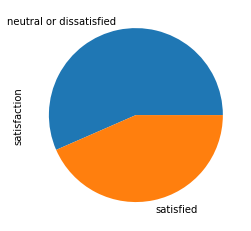

In [129]:
df.iloc[:,24:25].groupby(['satisfaction'])['satisfaction'].count().plot(kind='pie', y='satisfaction')

<AxesSubplot:>

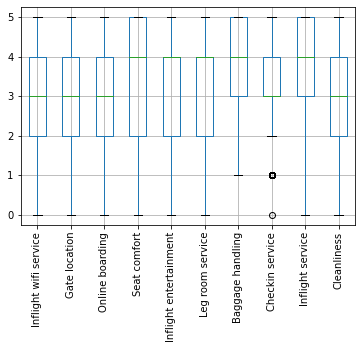

In [130]:
selected_feature_df.iloc[:, 4:14].boxplot(rot = 90)

<AxesSubplot:>

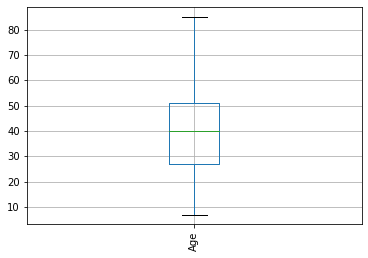

In [131]:
selected_feature_df.iloc[:, 1:2].boxplot(rot = 90)

<AxesSubplot:>

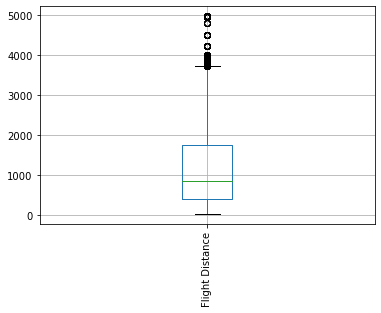

In [132]:
selected_feature_df.iloc[:, 3:4].boxplot(rot = 90)

array([[<AxesSubplot:title={'center':'Arrival Delay in Minutes'}>]],
      dtype=object)

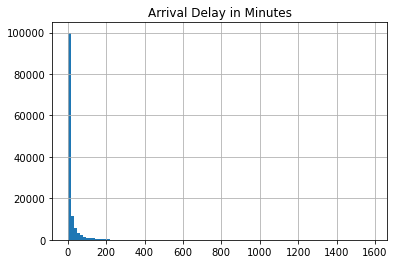

In [133]:
selected_feature_df.hist(column='Arrival Delay in Minutes', bins=100)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

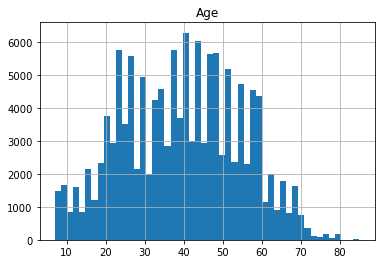

In [134]:
selected_feature_df.hist(column='Age', bins=50)

array([[<AxesSubplot:title={'center':'Flight Distance'}>]], dtype=object)

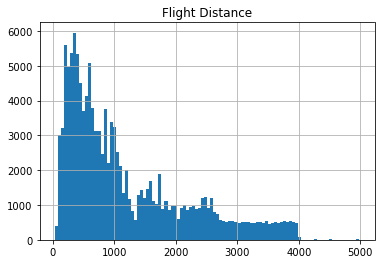

In [135]:
selected_feature_df.hist(column='Flight Distance', bins=100)

## Initial Model Training

In [136]:

estimators = {
    'Logistic Regression': LogisticRegression(), 
    'LDA': LinearDiscriminantAnalysis(),
    'Support Vector Machine': LinearSVC(C=1.0, dual=True, fit_intercept=True,
                          intercept_scaling=1.0, max_iter=1000000,
                          random_state=None, tol=0.0001, verbose=0),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP': MLPClassifier(solver = "lbfgs", hidden_layer_sizes = (10), random_state=3000)}
scorer = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1': make_scorer(f1_score)}
kfold = KFold(n_splits = 5, random_state=3000, shuffle=True)

Logistic Regression:
	Accuracy value for training set:   0.8706379035164495
	Accuracy value for testing set:   0.8709687384159149
	Error value for training set:   0.12936209648355046
	Error value for testing set:   0.12903126158408507
	Precision value for training set:   0.8635962547183685
	Precision value for testing set:   0.8657757980697847
	Recall value for training set:   0.8342923444862779
	Recall value for testing set:   0.8311595752262847
	F1 value for training set:   0.8486914210697468
	F1 value for testing set:   0.8481146140140358


Training ROC


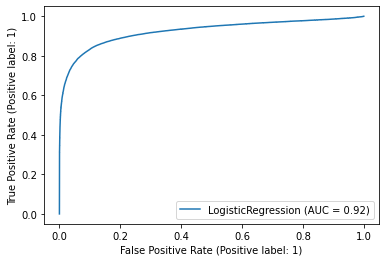

Testing ROC


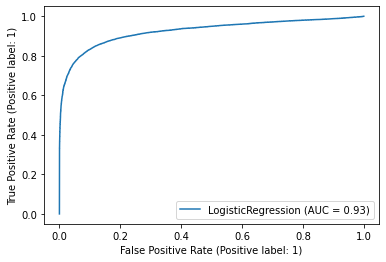

LDA:
	Accuracy value for training set:   0.8665190753230706
	Accuracy value for testing set:   0.8669529222785123
	Error value for training set:   0.1334809246769294
	Error value for testing set:   0.13304707772148772
	Precision value for training set:   0.8527455045075447
	Precision value for testing set:   0.8543731778425656
	Recall value for training set:   0.8377021619189695
	Recall value for testing set:   0.8354358206827739
	F1 value for training set:   0.8451568976432505
	F1 value for testing set:   0.8447983856437606


Training ROC


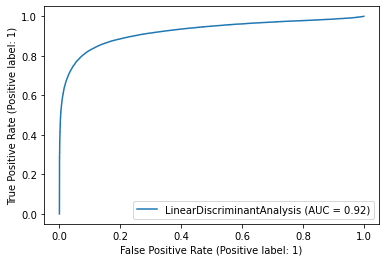

Testing ROC


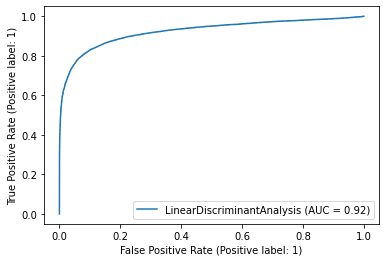

Support Vector Machine:
	Accuracy value for training set:   0.8697935437368068
	Accuracy value for testing set:   0.8702582478685283
	Error value for training set:   0.13020645626319316
	Error value for testing set:   0.12974175213147165
	Precision value for training set:   0.862289380877743
	Precision value for testing set:   0.8649491424753137
	Recall value for training set:   0.8337240415808292
	Recall value for testing set:   0.8303043261349868
	F1 value for training set:   0.8477661534016349
	F1 value for testing set:   0.8472727272727274


Training ROC


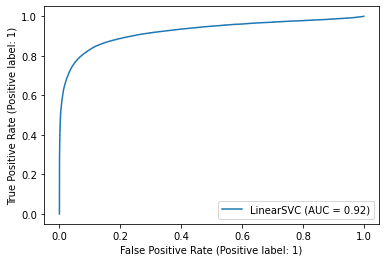

Testing ROC


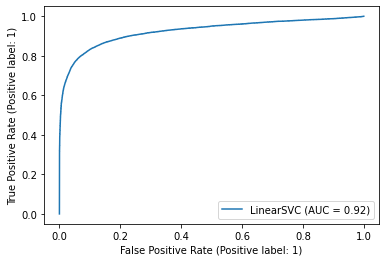

Decision Tree:
	Accuracy value for training set:   1.0
	Accuracy value for testing set:   0.9462189546521685
	Error value for training set:   0.0
	Error value for testing set:   0.05378104534783146
	Precision value for training set:   1.0
	Precision value for testing set:   0.9356920022688598
	Recall value for training set:   1.0
	Recall value for testing set:   0.9405601881548001
	F1 value for training set:   1.0
	F1 value for testing set:   0.9381197796339079


Training ROC


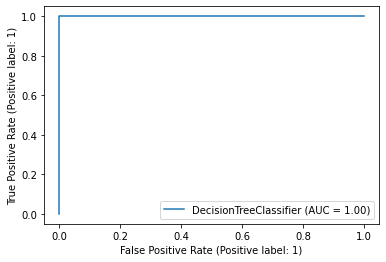

Testing ROC


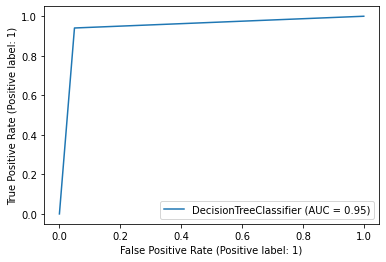

MLP:
	Accuracy value for training set:   0.952386346084539
	Accuracy value for testing set:   0.9516248609909799
	Error value for training set:   0.04761365391546102
	Error value for testing set:   0.04837513900902013
	Precision value for training set:   0.9556988100719773
	Precision value for testing set:   0.9554922166191625
	Recall value for training set:   0.9337927115152376
	Recall value for testing set:   0.9317938849689972
	F1 value for training set:   0.9446187750017966
	F1 value for testing set:   0.9434942628274519


Training ROC


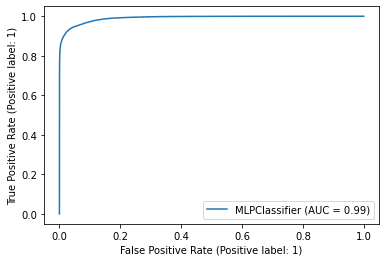

Testing ROC


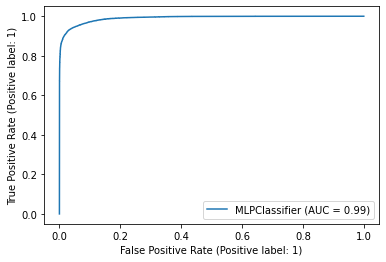

In [137]:
model_name = []
model_train_acc = []
model_test_acc = []
model_train_precision = []
model_test_precision = []
model_train_recall = []
model_test_recall = []
model_train_f1 = []
model_test_f1 = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for estimator_name, estimator_object in estimators.items():
        
        model_name.append(estimator_name[0:4])
        model = estimator_object.fit(X=X_train_selected, y=y_train)
        model_selection_prediction_train  = model.predict(X_train_selected)
        model_selection_prediction_test  = model.predict(X_test_selected)
        
        acc_score_train = accuracy_score(y_train, model_selection_prediction_train)
        acc_score_test = accuracy_score(y_test, model_selection_prediction_test)
        precision_score_train = precision_score(y_train, model_selection_prediction_train)
        precision_score_test = precision_score(y_test, model_selection_prediction_test)
        recall_score_train = recall_score(y_train, model_selection_prediction_train)
        recall_score_test = recall_score(y_test, model_selection_prediction_test)
        f1_score_train = f1_score(y_train, model_selection_prediction_train)
        f1_score_test = f1_score(y_test, model_selection_prediction_test)
        
        model_train_acc.append(acc_score_train)
        model_test_acc.append(acc_score_test)
        model_train_precision.append(precision_score_train)
        model_test_precision.append(precision_score_test)
        model_train_recall.append(recall_score_train)
        model_test_recall.append(recall_score_test)
        model_train_f1.append(f1_score_train)
        model_test_f1.append(f1_score_test)
        
    
        print(estimator_name+":")
        print("\t" + "Accuracy value for training set:  ", acc_score_train)
        print("\t" + "Accuracy value for testing set:  ", acc_score_test)
        print("\t" + "Error value for training set:  ", 1 - acc_score_train)
        print("\t" + "Error value for testing set:  ", 1 - acc_score_test)
        print("\t" + "Precision value for training set:  ", precision_score_train)
        print("\t" + "Precision value for testing set:  ", precision_score_test)
        print("\t" + "Recall value for training set:  ", recall_score_train)
        print("\t" + "Recall value for testing set:  ", recall_score_test)
        print("\t" + "F1 value for training set:  ", f1_score_train)
        print("\t" + "F1 value for testing set:  ", f1_score_test)
        print("\n")
        print("Training ROC")
        metrics.plot_roc_curve(model, X_train_selected, y_train) 
        plt.show()
        print("Testing ROC")
        metrics.plot_roc_curve(model, X_test_selected, y_test) 
        plt.show()

## Simple Model Prameter Tuning

In [138]:
#MLP
parameter_space = {
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05],
    'max_iter': [100, 500, 1000]
}
mlp = MLPClassifier()
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_selected, y_train)

F:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'max_iter': [100, 500, 1000]})

In [139]:
clf.best_params_

{'activation': 'tanh', 'alpha': 0.05, 'max_iter': 1000}

	Accuracy value for training set:   0.9624362868763837
	Accuracy value for testing set:   0.9587915482515754
	Error value for training set:   0.03756371312361628
	Error value for testing set:   0.04120845174842458
	Precision value for training set:   0.9750080023637752
	Precision value for testing set:   0.9699459619512917
	Recall value for training set:   0.9376524354147427
	Recall value for testing set:   0.9338607369396337
	F1 value for training set:   0.9559654289990825
	F1 value for testing set:   0.9515613652868553
Training ROC


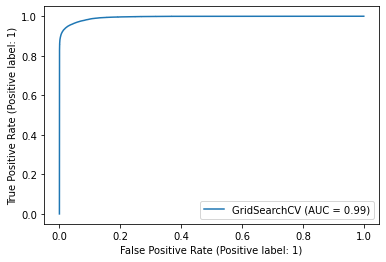

Testing ROC


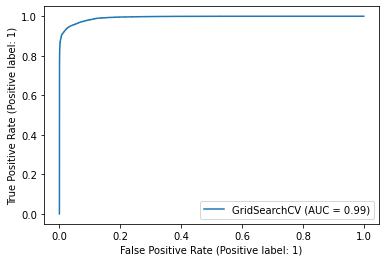

In [140]:
model_selection_prediction_train_clf  = clf.predict(X_train_selected)
model_selection_prediction_test_clf  = clf.predict(X_test_selected)

acc_score_train_clf = accuracy_score(y_train, model_selection_prediction_train_clf)
acc_score_test_clf = accuracy_score(y_test, model_selection_prediction_test_clf)
precision_score_train_clf = precision_score(y_train, model_selection_prediction_train_clf)
precision_score_test_clf = precision_score(y_test, model_selection_prediction_test_clf)
recall_score_train_clf = recall_score(y_train, model_selection_prediction_train_clf)
recall_score_test_clf = recall_score(y_test, model_selection_prediction_test_clf)
f1_score_train_clf = f1_score(y_train, model_selection_prediction_train_clf)
f1_score_test_clf = f1_score(y_test, model_selection_prediction_test_clf)
print("\t" + "Accuracy value for training set:  ", acc_score_train_clf)
print("\t" + "Accuracy value for testing set:  ", acc_score_test_clf)
print("\t" + "Error value for training set:  ", 1 - acc_score_train_clf)
print("\t" + "Error value for testing set:  ", 1 - acc_score_test_clf)
print("\t" + "Precision value for training set:  ", precision_score_train_clf)
print("\t" + "Precision value for testing set:  ", precision_score_test_clf)
print("\t" + "Recall value for training set:  ", recall_score_train_clf)
print("\t" + "Recall value for testing set:  ", recall_score_test_clf)
print("\t" + "F1 value for training set:  ", f1_score_train_clf)
print("\t" + "F1 value for testing set:  ", f1_score_test_clf)
print("Training ROC")
metrics.plot_roc_curve(clf, X_train_selected, y_train) 
plt.show()
print("Testing ROC")
metrics.plot_roc_curve(clf, X_test_selected, y_test) 
plt.show()

## Cross Validation

In [141]:
score_name = ['accuracy', 'precision', 'recall', 'f1']
cv_df_test = pd.DataFrame(columns = score_name, index = estimators.keys())
cv_df_train = pd.DataFrame(columns = score_name, index = estimators.keys())

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for estimator_name, estimator_object in estimators.items():
        
        results = cross_validate(estimator=estimator_object, X=X_train_selected, y=y_train, cv=kfold, scoring=scorer)

        ##acc_score_train = results['train_accuracy'].mean()
        acc_score_test = results['test_accuracy'].mean()
        ##precision_score_train = results['train_precision'].mean()
        precision_score_test = results['test_precision'].mean()
        ##recall_score_train = results['train_recall'].mean()
        recall_score_test = results['test_recall'].mean()
        ##f1_score_train = results['train_f1'].mean()
        f1_score_test = results['test_f1'].mean()
        
        ##cv_df_train.loc[estimator_name, 'accuracy'] = acc_score_train
        ##cv_df_train.loc[estimator_name, 'precision'] = precision_score_train
        ##cv_df_train.loc[estimator_name, 'recall'] = recall_score_train
        ##cv_df_train.loc[estimator_name, 'f1'] = 1 - f1_score_train
        
        cv_df_test.loc[estimator_name, 'accuracy'] = acc_score_test
        cv_df_test.loc[estimator_name, 'precision'] = precision_score_test
        cv_df_test.loc[estimator_name, 'recall'] = recall_score_test
        cv_df_test.loc[estimator_name, 'f1'] = 1 - f1_score_test
    
        
        print(estimator_name+":")
        ##print("\t" + "Accuracy value for training set:  ", acc_score_train)
        print("\t" + "Accuracy value for testing set:  ", acc_score_test)
        ##print("\t" + "Precision value for training set:  ", precision_score_train)
        print("\t" + "Precision value for testing set:  ", precision_score_test)
        ##print("\t" + "Recall value for training set:  ", recall_score_train)
        print("\t" + "Recall value for testing set:  ", recall_score_test)
        ##print("\t" + "F1 value for training set:  ", f1_score_train)
        print("\t" + "F1 value for testing set:  ", f1_score_test)
        

Logistic Regression:
	Accuracy value for testing set:   0.8704010708953301
	Precision value for testing set:   0.8634726532533126
	Recall value for testing set:   0.833775994377729
	F1 value for testing set:   0.8483609239155037
LDA:
	Accuracy value for testing set:   0.8664058075477528
	Precision value for testing set:   0.852734554130859
	Recall value for testing set:   0.8373831846773404
	F1 value for testing set:   0.8449877041985069
Support Vector Machine:
	Accuracy value for testing set:   0.8696699788910054
	Precision value for testing set:   0.8621760811238877
	Recall value for testing set:   0.8335205745203205
	F1 value for testing set:   0.8476029570160069
Decision Tree:
	Accuracy value for testing set:   0.9452916645214436
	Precision value for testing set:   0.9359472901996998
	Recall value for testing set:   0.9384497478475631
	F1 value for testing set:   0.9371846401711345
MLP:
	Accuracy value for testing set:   0.9516243628687638
	Precision value for testing set:   0.9549

## Random Forest (with Hyperparameter Tuning)

C:\Users\socra\AppData\Local\Temp/ipykernel_19996/938487311.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest = random_forest.fit(X=X_train_selected, y=y_train)


For t =  10


Training ROC


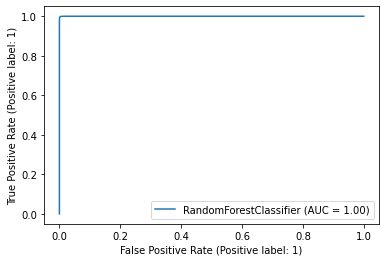

Testing ROC


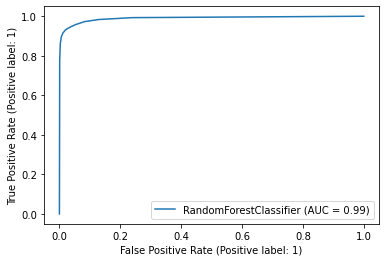

C:\Users\socra\AppData\Local\Temp/ipykernel_19996/938487311.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest = random_forest.fit(X=X_train_selected, y=y_train)


For t =  50


Training ROC


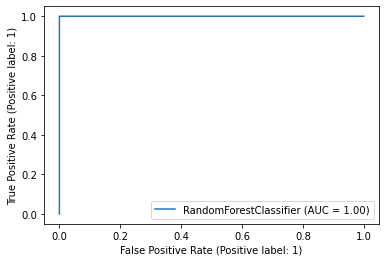

Testing ROC


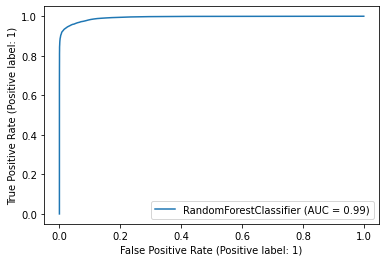

C:\Users\socra\AppData\Local\Temp/ipykernel_19996/938487311.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest = random_forest.fit(X=X_train_selected, y=y_train)


For t =  100


Training ROC


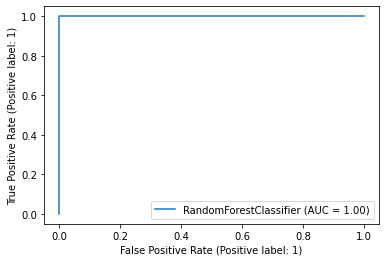

Testing ROC


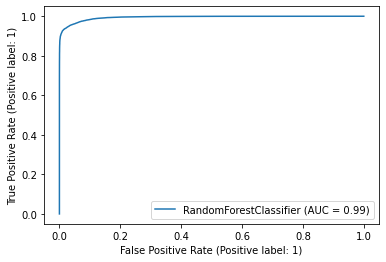

C:\Users\socra\AppData\Local\Temp/ipykernel_19996/938487311.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest = random_forest.fit(X=X_train_selected, y=y_train)


For t =  500


Training ROC


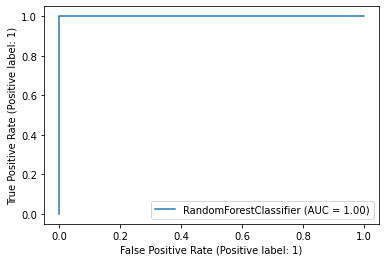

Testing ROC


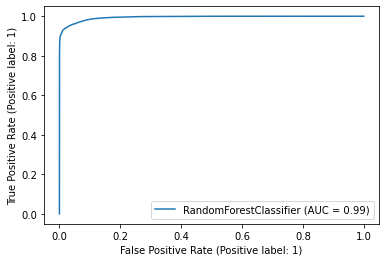

In [142]:
t_range = [10,50,100,500]
score_name = ['accuracy', 'error', 'precision', 'recall', 'f1', 'auc']
train_random_forest_df = pd.DataFrame(columns = score_name, index = t_range)
test_random_forest_df = pd.DataFrame(columns = score_name, index = t_range)

for i in t_range:
    random_forest = RandomForestClassifier(n_estimators = i)
    random_forest = random_forest.fit(X=X_train_selected, y=y_train)
    
    train_predict = random_forest.predict(X_train_selected)
    test_predict = random_forest.predict(X_test_selected)
    
    acc_train = accuracy_score(y_train, train_predict)
    acc_test = accuracy_score(y_test, test_predict)
    
    precision_train = precision_score(y_train, train_predict)
    precision_test = precision_score(y_test, test_predict)
    
    recall_train = recall_score(y_train, train_predict)
    recall_test = recall_score(y_test, test_predict)
    
    train_random_forest_df.loc[i, 'accuracy'] = acc_train
    train_random_forest_df.loc[i, 'error'] = 1 - acc_train
    train_random_forest_df.loc[i, 'precision'] = precision_train
    train_random_forest_df.loc[i, 'recall'] = recall_train
    train_random_forest_df.loc[i, 'f1'] = f1_score(y_train, train_predict)
    train_random_forest_df.loc[i, 'auc'] = roc_auc_score(y_train, train_predict)
    
    test_random_forest_df.loc[i, 'accuracy'] = acc_test
    test_random_forest_df.loc[i, 'error'] = 1 - acc_test
    test_random_forest_df.loc[i, 'precision'] = precision_test
    test_random_forest_df.loc[i, 'recall'] = recall_test
    test_random_forest_df.loc[i, 'f1'] = f1_score(y_test, test_predict)
    test_random_forest_df.loc[i, 'auc'] = roc_auc_score(y_test, test_predict)
    print("For t = ", i)
    print("\n")
    print("Training ROC")
    metrics.plot_roc_curve(random_forest, X_train_selected, y_train) 
    plt.show()
    print("Testing ROC")
    metrics.plot_roc_curve(random_forest, X_test_selected, y_test) 
    plt.show()

In [143]:
test_random_forest_df

,accuracy,error,precision,recall,f1,auc
10,0.958884,0.041116,0.97233,0.931651,0.951556,0.955684
50,0.962406,0.037594,0.975297,0.936997,0.955763,0.95942
100,0.961942,0.038058,0.972532,0.938707,0.95532,0.959212
500,0.962313,0.037687,0.973324,0.938778,0.955739,0.959548


In [144]:
train_random_forest_df

,accuracy,error,precision,recall,f1,auc
10,0.996386,0.003614,0.999261,0.992423,0.99583,0.995929
50,0.999907,0.000093,1.0,0.999787,0.999893,0.999893
100,0.99999,0.00001,1.0,0.999976,0.999988,0.999988
500,1.0,0.0,1.0,1.0,1.0,1.0


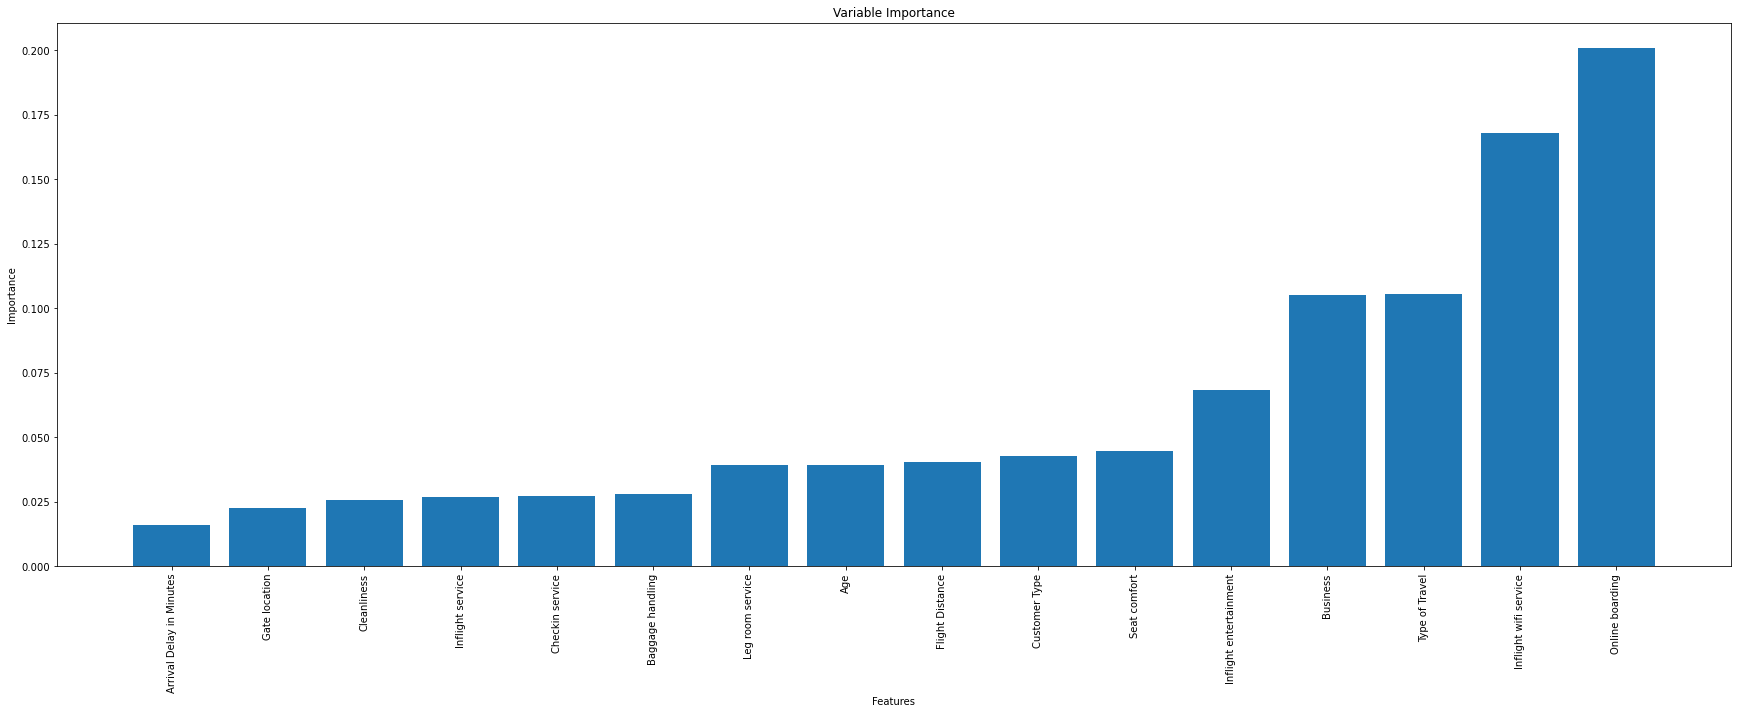

In [145]:
##Feature Importance
importance = random_forest.feature_importances_

features_sorted = []
importance_sorted = []

for i in range(0, 16):
    sort_dict[feature_name_list[15][i]] = importance[i]

sort_dict = dict(sorted(sort_dict.items(), key=lambda item: item[1]))

plt.figure(figsize=(30, 10))
plt.bar([*sort_dict.keys()], [*sort_dict.values()])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Variable Importance")
plt.show()

## Adaboost

For estimator Logistic Regression


  0%|          | 0/3 [00:00<?, ?it/s]

For model number  10
Training ROC


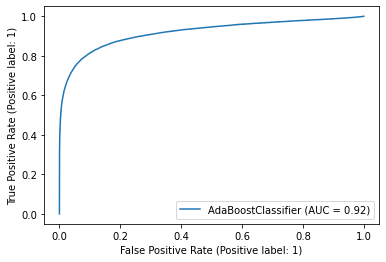

Testing ROC


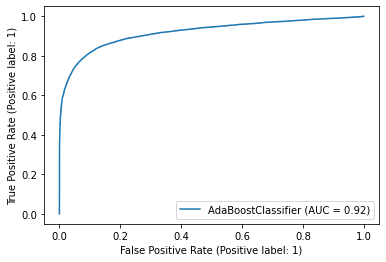

 33%|███▎      | 1/3 [00:01<00:02,  1.08s/it]

For model number  300
Training ROC


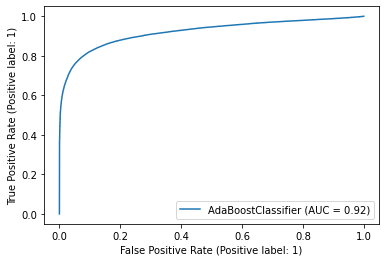

Testing ROC


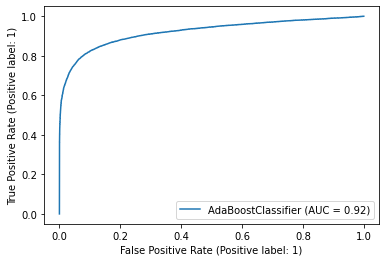

 67%|██████▋   | 2/3 [00:16<00:09,  9.30s/it]

For model number  1000
Training ROC


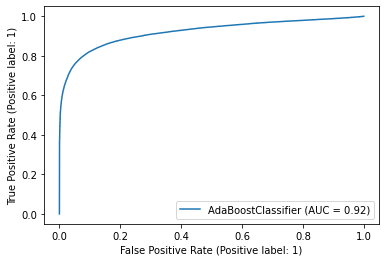

Testing ROC


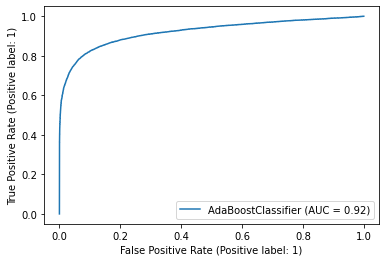

100%|██████████| 3/3 [01:02<00:00, 20.98s/it]


For estimator Decision Tree Stump


  0%|          | 0/3 [00:00<?, ?it/s]

For model number  10
Training ROC


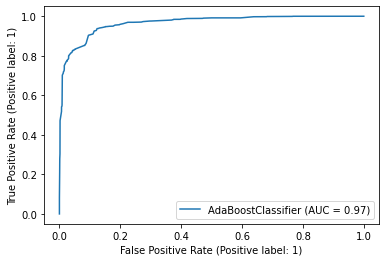

Testing ROC


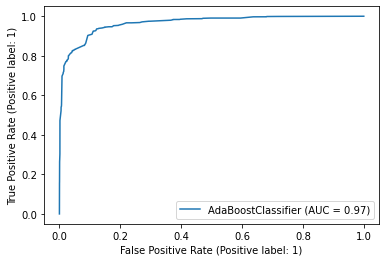

 33%|███▎      | 1/3 [00:01<00:02,  1.38s/it]

For model number  300
Training ROC


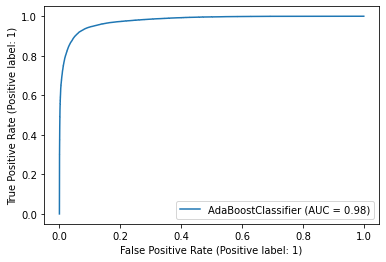

Testing ROC


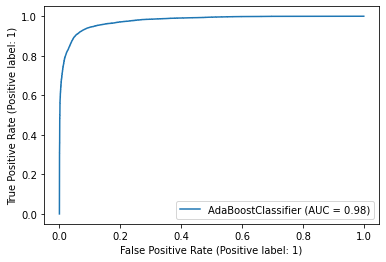

 67%|██████▋   | 2/3 [00:27<00:16, 16.14s/it]

For model number  1000
Training ROC


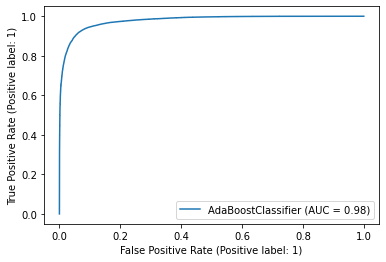

Testing ROC


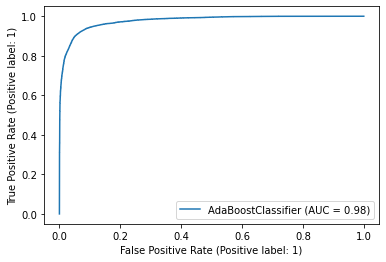

100%|██████████| 3/3 [01:51<00:00, 37.21s/it]


In [146]:
# df_dict = {}
# model_number_range = [10,300,1000]
# score_name = ['accuracy','error','precision','recall','f1','auc']
# estimators = {
#     'Logistic Regression': LogisticRegression(), 
#     'Decision Tree Stump': DecisionTreeClassifier(max_depth = 1)}

# for estimator_name, estimator_object in estimators.items():
#     df_dict[estimator_name + " train"] = pd.DataFrame(columns = score_name, index = model_number_range)
#     df_dict[estimator_name + " test"] = pd.DataFrame(columns = score_name, index = model_number_range)
#     print('For estimator ' + estimator_name)
#     for i in tqdm(model_number_range):
#         print('For model number ', i)
#         ada = AdaBoostClassifier(base_estimator = estimator_object, n_estimators = i)
#         ada = ada.fit(X_train_selected, y_train.values.ravel())

#         train_predict = ada.predict(X_train_selected)
#         test_predict = ada.predict(X_test_selected)

#         acc_train = accuracy_score(y_train, train_predict)
#         acc_test = accuracy_score(y_test, test_predict)
        
#         precision_train = precision_score(y_train, train_predict)
#         precision_test = precision_score(y_test, test_predict)

#         recall_train = recall_score(y_train, train_predict)
#         recall_test = recall_score(y_test, test_predict)

#         df_dict[estimator_name + " train"].loc[i, 'accuracy'] = acc_train
#         df_dict[estimator_name + " train"].loc[i, 'error'] = 1 - acc_train
#         df_dict[estimator_name + " train"].loc[i, 'precision'] = precision_train
#         df_dict[estimator_name + " train"].loc[i, 'recall'] = recall_train
#         df_dict[estimator_name + " train"].loc[i, 'f1'] = f1_score(y_train, train_predict)
#         df_dict[estimator_name + " train"].loc[i, 'auc'] = roc_auc_score(y_train, train_predict)
#         df_dict[estimator_name + " test"].loc[i, 'accuracy'] = acc_test
#         df_dict[estimator_name + " test"].loc[i, 'error'] = 1 - acc_test
#         df_dict[estimator_name + " test"].loc[i, 'precision'] = precision_test
#         df_dict[estimator_name + " test"].loc[i, 'recall'] = recall_test
#         df_dict[estimator_name + " test"].loc[i, 'f1'] = f1_score(y_test, test_predict)
#         df_dict[estimator_name + " test"].loc[i, 'auc'] = roc_auc_score(y_test, test_predict)
#         print("Training ROC")
#         metrics.plot_roc_curve(ada, X_train_selected, y_train) 
#         plt.show()
#         print("Testing ROC")
#         metrics.plot_roc_curve(ada, X_test_selected, y_test) 
#         plt.show()

In [147]:
# #Printing metrics for boosting with different base models
# df_dict

{'Logistic Regression train':       accuracy     error precision    recall        f1       auc
 10    0.857962  0.142038  0.838641  0.833795  0.836211  0.855176
 300    0.85926   0.14074  0.835554  0.842083  0.838806   0.85728
 1000   0.85926   0.14074  0.835554  0.842083  0.838806   0.85728,
 'Logistic Regression test':       accuracy     error precision    recall        f1       auc
 10    0.860435  0.139565  0.841482  0.835365  0.838412  0.857489
 300   0.860404  0.139596  0.837449  0.841209  0.839324  0.858149
 1000  0.860404  0.139596  0.837449  0.841209  0.839324  0.858149,
 'Decision Tree Stump train':       accuracy     error precision    recall        f1       auc
 10    0.889718  0.110282  0.889658  0.852075  0.870461  0.885379
 300   0.928034  0.071966  0.923908  0.909403  0.916598  0.925886
 1000  0.928054  0.071946  0.923952  0.909403   0.91662  0.925904,
 'Decision Tree Stump test':       accuracy     error precision    recall        f1       auc
 10    0.890801  0.109199